# Step 3. Exploratory Modeling
#### This notebook is for exploratory modeling to examine our dataset. Both traditional maching learning metric (logistics regression) and deep leraning metric (neural network) have been applied to predict the win or lose of each game. The initial results from each model will be useful for the future modeling.

## Logistic Regression Model

In [2]:
import getpass

mypasswd = getpass.getpass()

········


In [3]:
import psycopg2
import pandas as pd
import numpy as np
from psycopg2.extensions import adapt, register_adapter, AsIs

# Then connects to the DB
connection = psycopg2.connect(database = 'capstonesp23olt05', 
                              user = 'txdy8', 
                              host = 'pgsql.dsa.lan',
                              password = mypasswd)

cursor = connection.cursor()

In [4]:
statement = f"""
SELECT *
FROM team_weekly_stats_running
order by gametime_year 
"""
sql_df = pd.read_sql_query(statement, con=connection)
sql_df.head()

,game_id,team_id,team_name,team_score,team_games_played,gametime_year,gametime_week,gametime_day,opponent_id,opponent_name,...,extra_points_made,field_goals_attempted,field_goals_made,two_point_conversions_attempted,two_point_conversions_made,safteys_made,point_differential,team_wins,team_losses,team_ties
0,2015_02_MIA_JAX,2250,Jacksonville Jaguars,23,2,2015,2,2015-09-20,2700,Miami Dolphins,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,-11.0,0.0,1.0,0.0
1,2015_20_ARI_CAR,750,Carolina Panthers,49,2,2015,20,2016-01-24,3800,Arizona Cardinals,...,3.529412,2.176471,1.823529,0.000000,0.000000,0.0,199.0,16.0,1.0,0.0
2,2015_13_CIN_CLE,1050,Cleveland Browns,3,12,2015,13,2015-12-06,920,Cincinnati Bengals,...,1.545455,1.727273,1.636364,0.363636,0.181818,0.0,-97.0,2.0,9.0,0.0
3,2015_08_SEA_DAL,4600,Seattle Seahawks,13,8,2015,8,2015-11-01,1200,Dallas Cowboys,...,2.000000,2.285714,2.285714,0.142857,0.142857,0.0,26.0,3.0,4.0,0.0
4,2015_17_TEN_IND,2100,Tennessee Titans,24,16,2015,17,2016-01-03,2200,Indianapolis Colts,...,1.733333,1.000000,0.866667,0.333333,0.200000,0.0,-118.0,3.0,12.0,0.0


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report,precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df1 = sql_df[sql_df['overtime'] != 'overtime']
df2 = df1[df1['win_or_loss'] != 'T']
df3 = df2.drop(['game_id', 'team_id', 'team_name', 'team_score', 'team_games_played', 'gametime_year', 'gametime_week',
                'gametime_day', 'opponent_id', 'opponent_name', 'opponent_score', 'overtime', 
                'fourth_down_conversions_percentage'], axis = 1)
df3['home_or_away'] = df3['home_or_away'].replace({'away':0,'home':1, 'neutral':2})
df3['win_or_loss'] = df3['win_or_loss'].replace({'L':0,'W':1})
df_finall = df3.dropna()
df_finall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 4345
Data columns (total 65 columns):
home_or_away                              3664 non-null int64
win_or_loss                               3664 non-null int64
passing_completions                       3664 non-null float64
passing_attempts                          3664 non-null float64
passings_incompletions                    3664 non-null float64
passing_completion_percentage             3664 non-null float64
passing_yards                             3664 non-null float64
passing_touchdowns                        3664 non-null float64
passing_interceptions                     3664 non-null float64
passing_touchdown_percentage              3664 non-null float64
passing_interception_percentage           3664 non-null float64
passing_qbr                               3664 non-null float64
passing_sack                              3664 non-null float64
passing_sack_yards                        3664 non-null float64
p

In [7]:
df_pick = df_finall[['third_down_conversions_percentage', 'passing_completion_percentage', 'passing_interception_percentage', 
                    'rushing_first_downs_earned', 'defensive_yards_per_play', 'offensive_yards_per_play', 'passing_qbr', 
                    'passing_first_downs_earned', 'opponent_penalties_committed_yards', 'rushing_yards_per_attempt', 
                    'passing_net_yards_per_attempt', 'fourth_down_attempts', 'penalties_committed_yards', 'win_or_loss']]

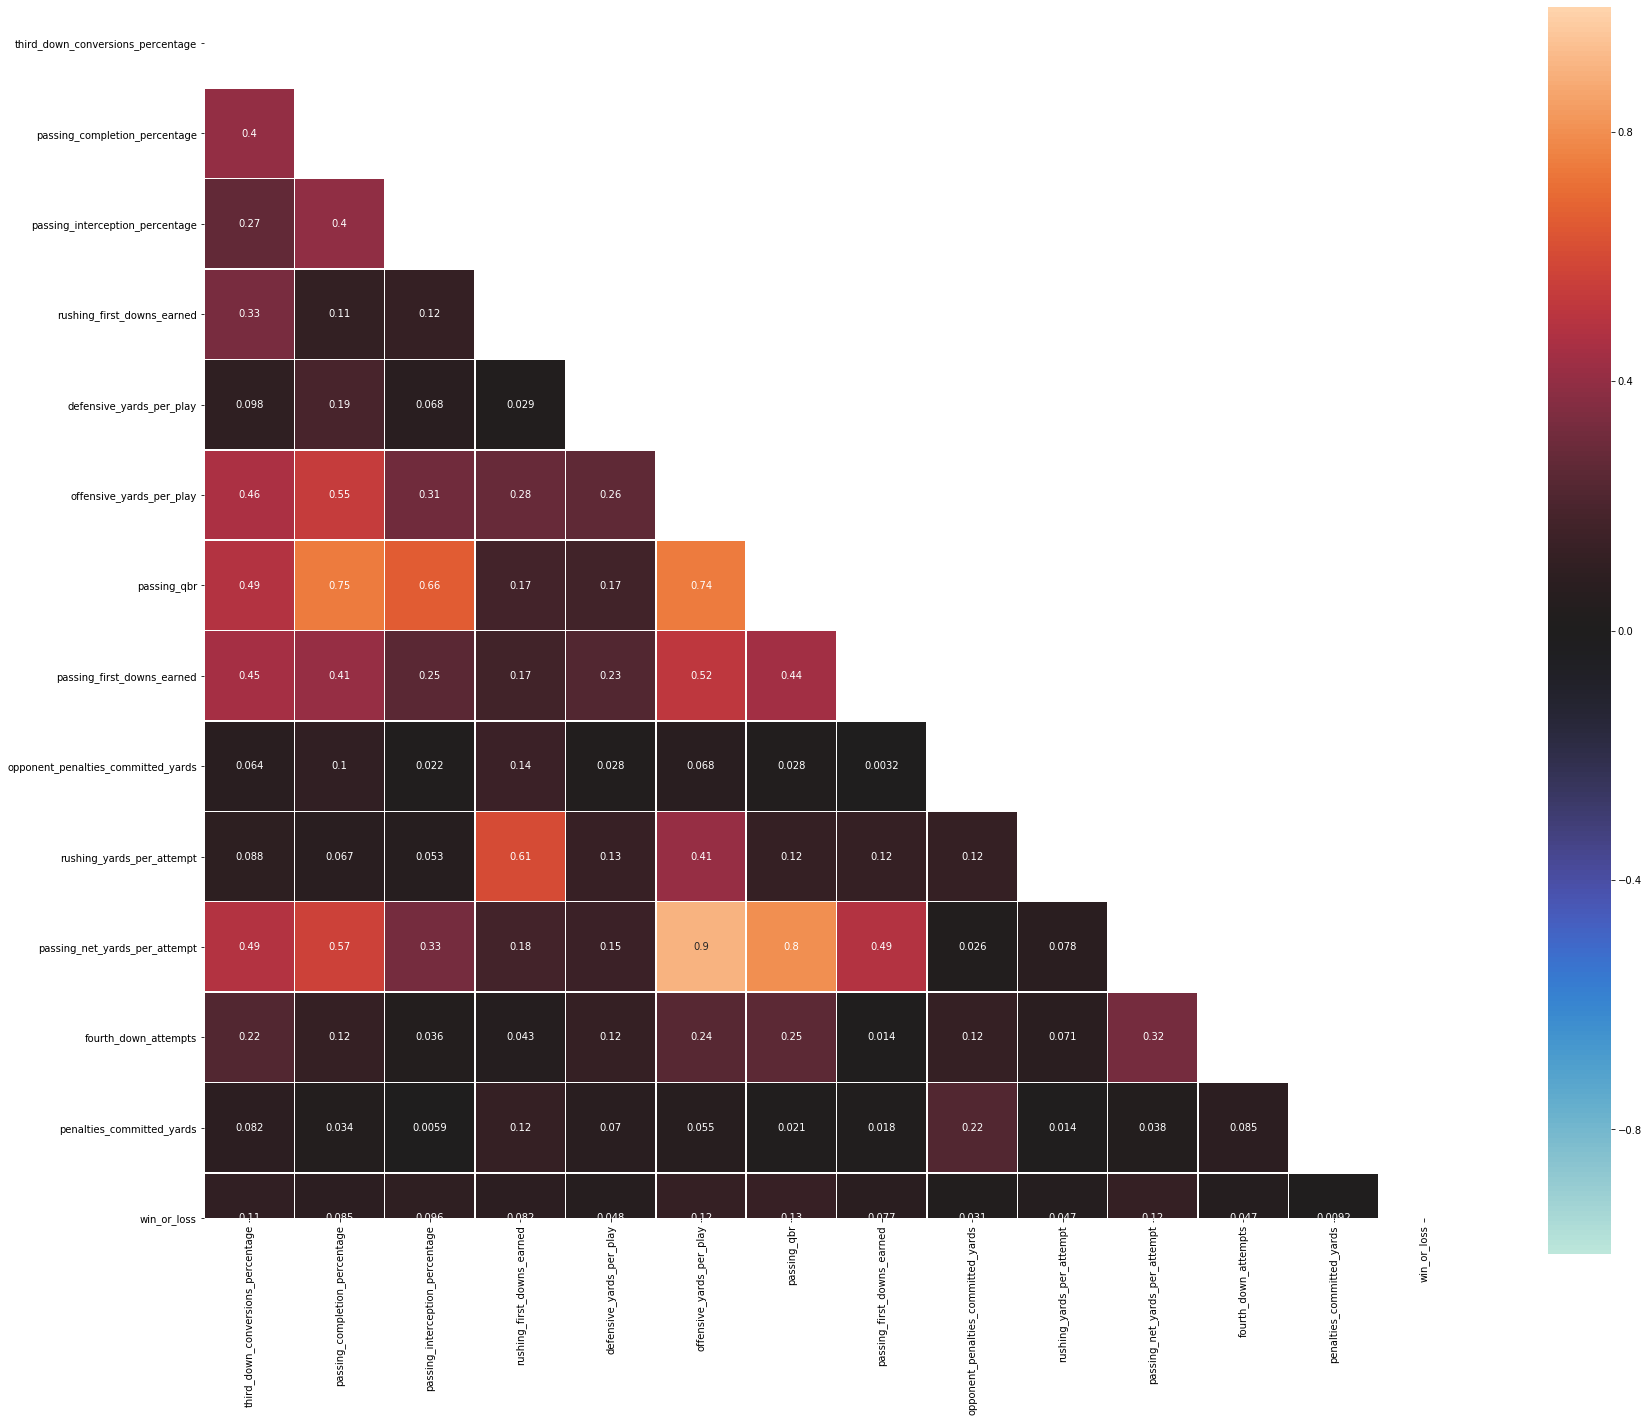

In [8]:
df_corr = df_pick.corr().abs()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 20))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True,
            square=True, center=0, linewidths=.5)
plt.tight_layout()

In [9]:
scaler = StandardScaler()
X = df_pick.drop('win_or_loss', axis=1)
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 5.56371722,  2.210713  , -1.99154211, ...,  0.44350288,
         0.33529982,  0.20078075],
       [-0.63702551,  1.05434563,  0.8725304 , ...,  0.52385862,
         0.50772406,  0.10263156],
       [ 0.36781592, -1.86240978, -0.80507805, ..., -0.3583504 ,
         0.11796236, -0.06094232],
       ...,
       [-0.20476427, -2.76105503, -0.41116853, ...,  0.49177134,
        -0.44318949, -0.44332092],
       [-1.9112977 , -0.75770625, -1.1931328 , ..., -0.38868405,
        -0.15949451, -0.10695552],
       [ 1.35542456,  1.06185885, -1.0857567 , ...,  0.42619873,
        -0.1701463 ,  0.05053494]])

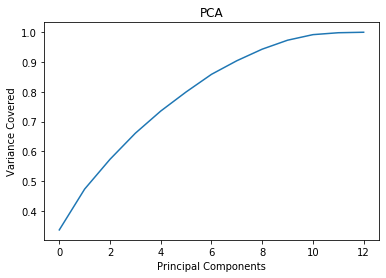

In [10]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [11]:
pca = PCA(n_components=9)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC7','PC9'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC7,PC9
0,5.563717,2.210713,-1.991542,-2.372054,0.644481,1.724977,0.585405,1.508707,-0.911274
1,-0.637026,1.054346,0.872530,-1.250452,0.099036,-0.007011,0.394399,-0.287422,-0.616488
2,0.367816,-1.862410,-0.805078,0.690492,-0.499428,0.050279,0.017190,-1.273064,-0.302273
3,-0.500505,1.336790,0.631627,-1.279869,-0.258220,1.308615,-0.898181,0.075081,0.689657
4,1.128346,-1.252284,-0.462252,-0.179331,0.428470,-0.257125,-0.830731,0.555476,-0.082819
...,...,...,...,...,...,...,...,...,...
3659,-1.326099,1.213851,1.210021,-0.072106,-0.221218,2.935851,2.735872,-0.235414,-0.892495
3660,3.665934,0.547247,1.125921,0.129203,-1.106663,-0.186209,-0.978352,0.290016,-0.780147
3661,-0.204764,-2.761055,-0.411169,-2.108503,-0.751250,-0.116215,0.362478,0.029436,-0.261000
3662,-1.911298,-0.757706,-1.193133,0.011898,0.360427,0.526286,-0.280767,0.421378,-0.417749


In [12]:
y = df_pick['win_or_loss']

x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25, random_state= 355)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [13]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       487
           1       0.55      0.55      0.55       429

   micro avg       0.58      0.58      0.58       916
   macro avg       0.58      0.58      0.58       916
weighted avg       0.58      0.58      0.58       916



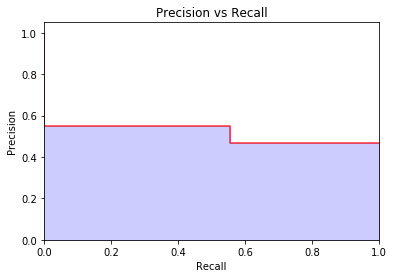

In [14]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='r', alpha=0.8,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [15]:
cfm = confusion_matrix(y_test,y_pred)
tp = cfm[0,0]
fp = cfm[0,1]
fn = cfm[1,0]
tn = cfm[1,1]
print ('True Positive  >', tp)
print ('False Positive >', fp)
print ('False Negetive >', fn)
print ('True Negetive  >', tn)

True Positive  > 291
False Positive > 196
False Negetive > 191
True Negetive  > 238


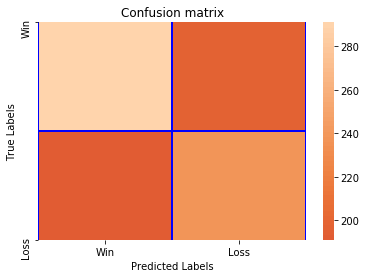

In [16]:
ax=plt.subplot()
sns.heatmap(cfm,annot=False,ax=ax,linewidths=1,linecolor='b',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Win','Loss'])
ax.yaxis.set_ticklabels(['Win','Loss'])
plt.show()

In [17]:
print ('Final prediction >', round((tp+tn)/(len(y_pred))*100,2))

Final prediction > 57.75


## Neural Network Model

In [18]:
sub_query = f"""
SELECT P.game_id,
P.team_name as away_team,
R.passing_completion_percentage as away_pass_comp_pct,
R.penalty_first_downs_earned as away_penalty_first_downs_earned,
R.passing_interception_percentage as away_pass_int_pct,
R.passing_qbr as away_qbr,
R.passing_yards_per_attempt as away_pass_per_attempt,
R.passing_net_yards_per_attempt as away_pass_net_yards_per_attempt,
R.rushing_first_downs_earned as away_rush_first_downs_earned,
R.rushing_attempts as away_rush_attempts,
R.punts as away_punts,
R.passing_first_downs_earned as away_passing_first_downs_earned,
R.third_down_conversions_percentage as away_third_downs_convs_pct,
R.fourth_down_attempts as away_fourth_down_attempts,
R.penalties_committed_yards as away_penalties_committed_yards,
R.rushing_yards_per_attempt as away_rush_yards_per_attempt,
R.total_yardage as away_total_yardage,
R.offensive_plays as away_offensive_plays,
R.defensive_plays as away_defensive_plays,
R.turnovers as away_turnovers,
R.touchdowns_scored as away_touchdowns,
R.field_goals_made as away_field_goals,
R.offensive_yards_per_play as away_off_yards_per_play,
R.defensive_yards_per_play as away_def_yards_per_play, 
R.total_return_touchdowns as away_avg_return_touchdowns
FROM team_weekly_stats P
INNER JOIN team_weekly_stats_running R ON P.game_id=R.game_id
INNER JOIN game G ON P.game_id=G.game_id
INNER JOIN line L ON P.game_id=L.game_id
where P.home_or_away= 'away' AND R.home_or_away= 'away' AND G.game_type = 'REG'
order by P.gametime_year,P.gametime_day,P.game_id
"""

big_query = f"""
SELECT P.game_id,
P.team_name,
P.opponent_name,
P.gametime_year,
P.gametime_week,
P.win_or_loss,
L.home_line_open,
-1*(P.team_score-P.opponent_score) as spread_actual,
CASE WHEN  -1*(P.team_score-P.opponent_score)<L.home_line_open THEN '0' ELSE '1' END as home_lose_spread,
R.passing_completion_percentage,
R.penalty_first_downs_earned,
R.passing_interception_percentage,
R.passing_qbr,
R.passing_yards_per_attempt,
R.passing_net_yards_per_attempt,
R.rushing_first_downs_earned,
R.passing_first_downs_earned,
R.third_down_conversions_percentage,
R.fourth_down_attempts,
R.penalties_committed_yards,
R.rushing_yards_per_attempt,
R.total_yardage,
R.offensive_plays,
R.defensive_plays,
R.turnovers,
R.touchdowns_scored,
R.field_goals_made,
R.offensive_yards_per_play,
R.defensive_yards_per_play,
R.rushing_attempts as home_rush_attempts,
R.punts as home_punts,
R.total_return_touchdowns as home_avg_return_touchdowns,
SUB.away_pass_comp_pct,
SUB.away_penalty_first_downs_earned,
SUB.away_pass_int_pct,
SUB.away_qbr,
SUB.away_pass_per_attempt,
SUB.away_pass_net_yards_per_attempt,
SUB.away_rush_first_downs_earned,
SUB.away_passing_first_downs_earned,
SUB.away_third_downs_convs_pct,
SUB.away_fourth_down_attempts,
SUB.away_penalties_committed_yards,
SUB.away_rush_yards_per_attempt,
SUB.away_total_yardage,
SUB.away_offensive_plays,
SUB.away_defensive_plays,
SUB.away_turnovers,
SUB.away_touchdowns,
SUB.away_field_goals,
SUB.away_off_yards_per_play,
SUB.away_def_yards_per_play,
SUB.away_rush_attempts,
SUB.away_punts,
SUB.away_avg_return_touchdowns
FROM team_weekly_stats P
INNER JOIN team_weekly_stats_running R ON P.game_id=R.game_id
INNER JOIN game G ON P.game_id=G.game_id
INNER JOIN line L ON P.game_id=L.game_id
INNER JOIN ({sub_query}) SUB ON P.game_id=SUB.game_id
where P.home_or_away= 'home' AND R.home_or_away= 'home' AND G.game_type = 'REG'
order by P.gametime_year,P.gametime_day,P.game_id
"""
sql_df = pd.read_sql_query(big_query, con=connection)
df_origin = sql_df.copy()
df_origin.tail()

,game_id,team_name,opponent_name,gametime_year,gametime_week,win_or_loss,home_line_open,spread_actual,home_lose_spread,passing_completion_percentage,...,away_offensive_plays,away_defensive_plays,away_turnovers,away_touchdowns,away_field_goals,away_off_yards_per_play,away_def_yards_per_play,away_rush_attempts,away_punts,away_avg_return_touchdowns
2073,2022_18_MIN_CHI,Chicago Bears,Minnesota Vikings,2022,18,L,2.5,16,1,59.53750,...,65.7500,66.7500,1.3125,2.9375,1.4375,5.336250,5.958125,22.8750,4.5625,0.1250
2074,2022_18_NE_BUF,Buffalo Bills,New England Patriots,2022,18,W,-10.0,-12,0,62.62000,...,58.8750,64.5625,1.2500,2.2500,1.9375,5.339375,4.924375,25.1250,4.7500,0.5000
2075,2022_18_NYG_PHI,Philadelphia Eagles,New York Giants,2022,18,W,-1.5,-6,0,65.93750,...,64.1250,62.8750,1.0000,2.3750,1.7500,5.263125,5.719375,31.1875,4.3125,0.1250
2076,2022_18_NYJ_MIA,Miami Dolphins,New York Jets,2022,18,W,1.0,-5,0,62.54375,...,63.8125,64.3125,1.4375,1.8125,1.7500,5.088750,4.865000,24.0625,4.8750,0.0625
2077,2022_18_TB_ATL,Atlanta Falcons,Tampa Bay Buccaneers,2022,18,W,-1.0,-13,0,62.13125,...,69.0625,62.8750,1.3125,1.8750,1.8750,5.147500,5.124375,22.8750,4.6250,0.0625


In [19]:
df1 = df_origin[df_origin['win_or_loss'] != 'T']
df1['win_or_loss'] = df1['win_or_loss'].replace({'L':0,'W':1})
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2077
Data columns (total 55 columns):
game_id                              2052 non-null object
team_name                            2052 non-null object
opponent_name                        2052 non-null object
gametime_year                        2052 non-null int64
gametime_week                        2052 non-null int64
win_or_loss                          2052 non-null int64
home_line_open                       2052 non-null float64
spread_actual                        2052 non-null int64
home_lose_spread                     2052 non-null object
passing_completion_percentage        2052 non-null float64
penalty_first_downs_earned           2052 non-null float64
passing_interception_percentage      2052 non-null float64
passing_qbr                          2052 non-null float64
passing_yards_per_attempt            2052 non-null float64
passing_net_yards_per_attempt        2052 non-null float64
rushing_first_downs_

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [21]:
X_origin = df2.drop('win_or_loss', axis=1)
Y_origin = df2['win_or_loss']

trainX, testX, trainY, testY = train_test_split(X_origin, Y_origin, test_size = 0.25)

In [22]:
trainX_mod = trainX.drop(['game_id', 'team_name', 'gametime_year', 'gametime_week', 'home_line_open', 
                          'spread_actual', 'opponent_name', 'home_lose_spread'], axis = 1)

testX_mod = testX.drop(['game_id', 'team_name', 'gametime_year', 'gametime_week', 'home_line_open', 
                          'spread_actual', 'opponent_name', 'home_lose_spread'], axis = 1)

In [23]:
sc = MinMaxScaler()

scaler = sc.fit(trainX_mod)
trainX_scaled = scaler.transform(trainX_mod)
testX_scaled = scaler.transform(testX_mod)

In [24]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,5),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.58


In [26]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.44      0.48       224
           1       0.61      0.68      0.64       289

   micro avg       0.58      0.58      0.58       513
   macro avg       0.57      0.56      0.56       513
weighted avg       0.57      0.58      0.57       513



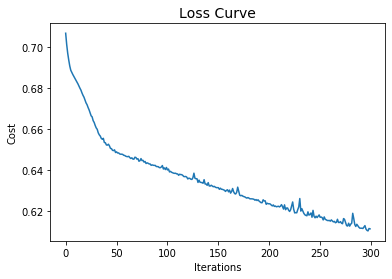

In [27]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [28]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [29]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


In [30]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 0.58


In [31]:
del mypasswd

In [32]:
connection.close()